### Running time

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


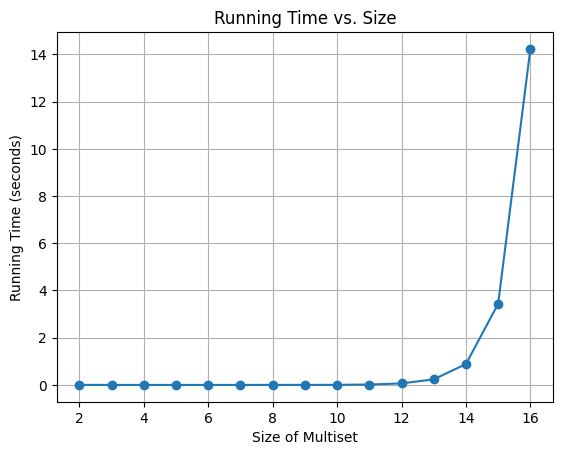

In [12]:
import time
import matplotlib.pyplot as plt
from itertools import combinations
import random

def generate_random_numbers(n):
    return [random.random() for _ in range(n)]

def make_combos(my_set):
    my_set = [x for x in my_set if x != 0]

    if len(my_set) < 2:
        raise ValueError("Size of the set must be greater than 2")

    combos = []
    for i in range(2, len(my_set) +1):
        combos.extend(combinations(my_set,i))
    combos_list = [list(comb) for comb in combos]
    unique_combo_list = []

    [unique_combo_list.append(x) for x in combos_list if x not in unique_combo_list]

    return unique_combo_list

def get_sums(combos, target):
    good_list= []
    for combo in combos:
        if sum(combo) == target:
            good_list.append(combo)

x = []
y = []
for i in range(15):
    toAdd = generate_random_numbers(i+2)
    
    start_time = time.time()

    combos = make_combos(toAdd)               
    result = get_sums(combos,5)

    end_time = time.time()        

    runTime = end_time - start_time
    x.append(i+2)
    y.append(runTime)
    print(i)

plt.plot(x, y, marker='o', linestyle='-')
plt.xlabel('Size of Multiset')
plt.ylabel('Running Time (seconds)')
plt.title('Running Time vs. Size')
plt.grid(True)
plt.show()

        

# Number of Logic Gates

[]
[14]
[14, 70]
[14, 70, 236]
[14, 70, 236, 652]
[14, 70, 236, 652, 1804]
[14, 70, 236, 652, 1804, 4342]
[14, 70, 236, 652, 1804, 4342, 9546]
[14, 70, 236, 652, 1804, 4342, 9546, 23882]
[14, 70, 236, 652, 1804, 4342, 9546, 23882, 51048]
[14, 70, 236, 652, 1804, 4342, 9546, 23882, 51048, 128778]
[14, 70, 236, 652, 1804, 4342, 9546, 23882, 51048, 128778, 286056]
[14, 70, 236, 652, 1804, 4342, 9546, 23882, 51048, 128778, 286056, 628144]
[14, 70, 236, 652, 1804, 4342, 9546, 23882, 51048, 128778, 286056, 628144, 1375628]
[14, 70, 236, 652, 1804, 4342, 9546, 23882, 51048, 128778, 286056, 628144, 1375628, 2967016]
[14, 70, 236, 652, 1804, 4342, 9546, 23882, 51048, 128778, 286056, 628144, 1375628, 2967016, 6420904]


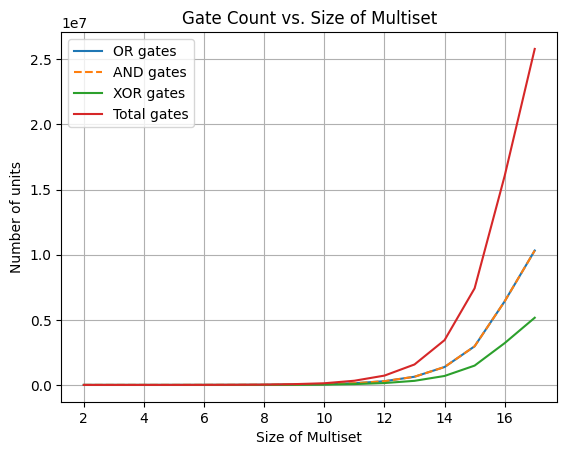

In [23]:
def count_bits(decimal_number):
    # Convert decimal number to binary
    binary_number = bin(decimal_number)

    # Remove '0b' prefix from binary representation
    binary_number = binary_number[2:]

    # Count the number of bits
    num_bits = len(binary_number)

    return num_bits

def get_num_gates(combo_list):
    oar = 0
    andy = 0
    xor = 0
    total = 0
    for combo in combo_list:
        large = max(combo)

        num_bits = count_bits(large)

        oar += (num_bits*2) * (len(combo)-1)
        andy += num_bits*2 * (len(combo)-1)
        xor += num_bits * (len(combo)-1)

        total += (num_bits*5) * (len(combo)-1)
    return(oar,andy,xor,total)

def generate_random_positive_integer(upper_bound):
    return random.randint(1, upper_bound)



#for each bit we add we need 5 gates, 2 xor, 2 and, and 1 or
x = []

oar = []
andy = []
xor = []

total = []
for i in range(16):
    toAdd = [generate_random_positive_integer(128) for _ in range(i + 2)]

    combos = make_combos(toAdd)               
    nums = get_num_gates(combos)

    x.append(i+2)

    print(oar)

    oar.append(nums[0])
    andy.append(nums[1])
    xor.append(nums[2])
    total.append(nums[3])


plt.plot(x, oar, label='OR gates')
plt.plot(x, andy, label='AND gates',linestyle = '--')
plt.plot(x, xor, label='XOR gates')
plt.plot(x, total, label='Total gates')

plt.xlabel('Size of Multiset')
plt.ylabel('Number of units')
plt.title('Gate Count vs. Size of Multiset')
plt.legend()
plt.grid(True)
plt.show()

